## Imports

In [1]:
import pandas as pd
import numpy as np

import sys
sys.path.append('../source/')

import helpers
from sklearn.utils import resample

In [2]:
rating_df = pd.read_csv("../data/processed/modeling/data_df_modeling.csv", index_col=0)

In [3]:
rating_df = rating_df.dropna()

It's time to remove string columns which not needed anymore.

In [4]:
rating_df.drop(["title", "status", "vote_average", "vote_count", "crew", "original_language", "revenue"], axis=1, inplace=True)

In [5]:
rating_df.columns

Index(['adult', 'budget', 'runtime', 'cast', 'success', 'year', 'month',
       'genres_drama', 'genres_comedy', 'genres_thriller',
       ...
       'spoken_languages_sn', 'spoken_languages_ty', 'spoken_languages_rm',
       'spoken_languages_ak', 'spoken_languages_ii', 'spoken_languages_mh',
       'spoken_languages_bi', 'spoken_languages_nn', 'spoken_languages_sd',
       'spoken_languages_pi'],
      dtype='object', length=183)

### Data Balancing

As we visualized on `EDA` Notebook, our data is not well balanced. We will apply undersampling methods to try fix this and don't bias our model.

**We will downsample majority feature to match minority one.**

In [6]:
majority_feature = rating_df[rating_df.success==0]
minority_feature = rating_df[rating_df.success==1]

In [7]:
len(majority_feature), len(minority_feature)

(113498, 5432)

As we said before, for every observation from minority feature dataframe, we will randomly match from one from majority randomly, with that we will downsample to keep the same length. 

In [8]:
downsampled_feature = resample(majority_feature, replace=False, n_samples=len(minority_feature), random_state=42)

In [9]:
df_downsampled = pd.concat([downsampled_feature, minority_feature])

### Dataset Split

In [10]:
X = df_downsampled.drop("success", axis=1)
y = df_downsampled.success

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,  stratify=y, test_size=0.3, shuffle=True, random_state=42)

## Modeling

We will test our data with different models. Our focus will be to reduce our False Positives. We want to avoid a company to invest money in a Movie Release which turns out is not a success.

### Imports

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### LogisticRegression
Logistic regression is one of the most common classification algorithms.

,data,model,accuracy,precision,recall,f1score,rocauc,logloss
0,training,LogisticRegression,0.523014,0.513284,0.889268,0.650877,0.616816,16.474843
1,test,LogisticRegression,0.517178,0.510294,0.862577,0.641094,0.596082,16.676415


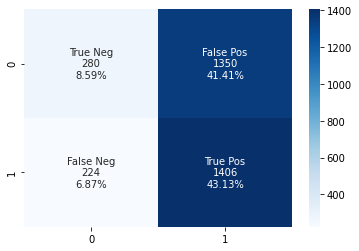

In [13]:
helpers.predict(LogisticRegression(), X_train, y_train, X_test, y_test, "LogisticRegression")

### KNeighborsClassifier

,data,model,accuracy,precision,recall,f1score,rocauc,logloss
0,training,KNeighborsClassifier,0.760913,0.763629,0.752236,0.758756,0.833706,5.032803
1,test,KNeighborsClassifier,0.732822,0.729994,0.723313,0.718112,0.795153,7.914343


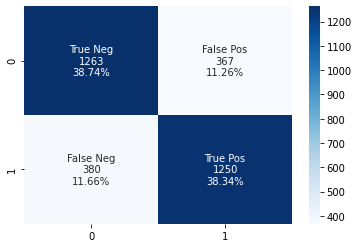

In [14]:
helpers.predict(KNeighborsClassifier(), X_train, y_train, X_test, y_test, "KNeighborsClassifier").head()

### LogisticRegression

,data,model,accuracy,precision,recall,f1score,rocauc,logloss
0,training,LogisticRegression,0.523015,0.513308,0.889263,0.650878,0.616659,16.474843
1,test,LogisticRegression,0.517178,0.510175,0.862577,0.641149,0.595828,16.676415


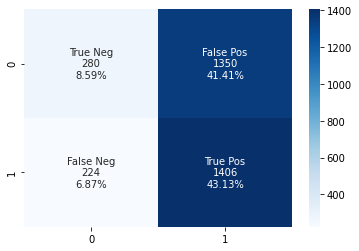

In [15]:
helpers.predict(LogisticRegression(), X_train, y_train, X_test, y_test, "LogisticRegression")

### DecisionTreeClassifier

,data,model,accuracy,precision,recall,f1score,rocauc,logloss
0,training,DecisionTreeClassifier,0.875985,0.851297,0.895581,0.874190,0.874012,9.992007e-16
1,test,DecisionTreeClassifier,0.843865,0.839738,0.863190,0.841694,0.847546,3.930700e+00


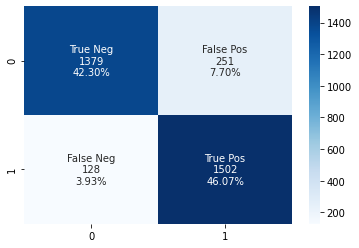

In [16]:
helpers.predict(DecisionTreeClassifier(), X_train, y_train, X_test, y_test, "DecisionTreeClassifier")

### RandomForestClassifier

,data,model,accuracy,precision,recall,f1score,rocauc,logloss
0,training,RandomForestClassifier,0.909258,0.893609,0.923987,0.909259,0.965930,9.992007e-16
1,test,RandomForestClassifier,0.890491,0.884379,0.895092,0.887363,0.946536,2.902994e+00


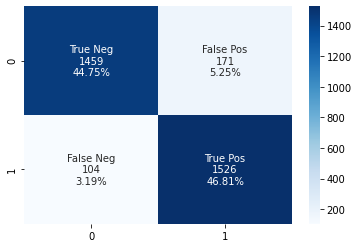

In [17]:
helpers.predict(RandomForestClassifier(), X_train, y_train, X_test, y_test, "RandomForestClassifier")

## Conclusion

As we saw before, RandomForestClassifier is the model that gives us the best results with only 5% of False Positives.